In [19]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [203]:
start = dt.datetime(2017,1,1)
end = dt.date.today()

**Apple, IBM, Google, Amazon stocks**

In [204]:
stocks = ['AAPL','IBM','GOOGL','AMZN']

In [286]:
#Fetch the data with pandas datareader
data = pdr.get_data_yahoo(stocks,start,end)

In [206]:
#Getting the Adj. Close price

data = data['Adj Close']

In [207]:
data.head()

Symbols,AAPL,IBM,GOOGL,AMZN
Date,,,,
2017-01-03,27.219839,124.062141,40.400501,37.683498
2017-01-04,27.189367,125.598206,40.388500,37.859001
2017-01-05,27.327635,125.182663,40.651001,39.022499
2017-01-06,27.632290,125.798508,41.260502,39.799500
2017-01-09,27.885389,124.403526,41.359001,39.846001


In [208]:
data.shape

(1408, 4)

In [209]:
#Turn the prices into percentage changes and drop the first row

returns = np.log(data / data.shift(1)).dropna()

In [210]:
returns.head()


Symbols,AAPL,IBM,GOOGL,AMZN
Date,,,,
2017-01-04,-0.001120,0.012305,-0.000297,0.004646
2017-01-05,0.005072,-0.003314,0.006478,0.030270
2017-01-06,0.011087,0.004908,0.014882,0.019716
2017-01-09,0.009118,-0.011151,0.002384,0.001168
2017-01-10,0.001008,-0.012787,-0.001415,-0.001281


In [287]:
#Covariance matrix
returns.cov()

Symbols,AAPL,IBM,GOOGL,AMZN
Symbols,,,,
AAPL,0.000380,0.000136,0.000239,0.000258
IBM,0.000136,0.000274,0.000130,0.000103
GOOGL,0.000239,0.000130,0.000325,0.000250
AMZN,0.000258,0.000103,0.000250,0.000427


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

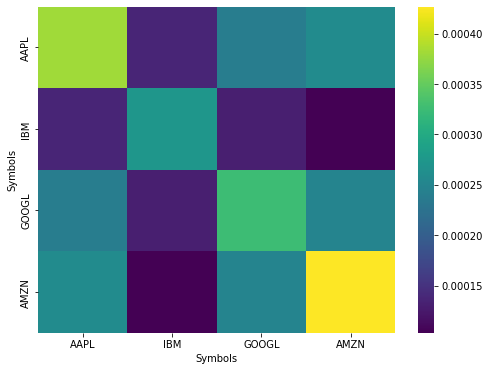

In [288]:
#Plotting the covariance matrix into a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(returns.cov(),cmap='viridis')

**Simulating 5000 different portfolios**

In [269]:
n = 5000
weight = np.zeros((n,len(stocks)))

meanRet = returns.mean()
sigma = returns.cov()

exp_return = np.zeros(n)
exp_volatility = np.zeros(n)
sharpe_ratio = np.zeros(n)

for k in range(n):
    w = np.array(np.random.random(len(stocks)))
    w = w / np.sum(w)
    weight[k, :] = w
    
    exp_return[k] = np.sum(meanRet * w)*252
    exp_volatility[k] = np.sqrt(np.dot(w.T,np.dot(sigma,w))*252)
    
    sharpe_ratio[k] = exp_return[k] / exp_volatility[k]

In [346]:
#Index of the highest sharpe ratio portfolio
max_index = sharpe_ratio.argmax()

#Index of the minimum variance/volatility portfolio
min_vola = exp_volatility.argmin()



In [347]:
rtns = np.linspace(0.05,0.31,50)
opt_volatility = []

def minimizeMyVolatility(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T,np.dot(sigma,w))*252)
    return V

def getReturn(w):
    w = np.array(w)
    R = np.sum(meanRet*w)*252
    return R


for R in rtns:
    constraints2 = ({'type':'eq', 'fun':checkToSum}, {'type':'eq','fun':lambda w: getReturn(w) - R})
    
    opt = minimize(minimizeMyVolatility,w0,method='SLSQP',bounds=bnds,constraints=constraints2)
    
    opt_volatility.append(opt['fun'])



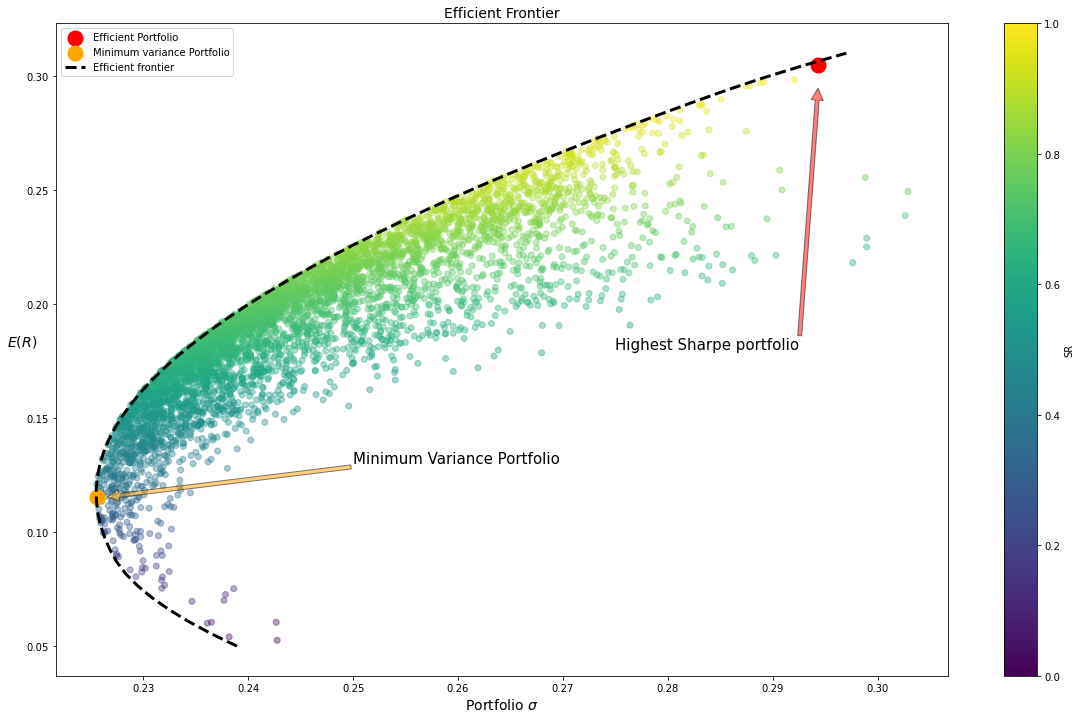

In [349]:
plt.figure(figsize=(20,12))
plt.scatter(exp_volatility, exp_return,alpha=0.4,c=sharpe_ratio)
plt.scatter(exp_volatility[max_index], exp_return[max_index],label='Efficient Portfolio',c='red',lw=10)
plt.scatter(exp_volatility[min_vola],exp_return[min_vola],label='Minimum variance Portfolio',c='orange',lw=10)
plt.plot(opt_volatility,rtns,label='Efficient frontier',lw=3,c='black',ls='--')
plt.colorbar(label='SR')
plt.xlabel(r'Portfolio $\sigma$',fontsize=14)
plt.annotate('Highest Sharpe portfolio',xy=(exp_volatility[max_index],exp_return[max_index]-0.01),xytext=(0.275,0.18),fontsize=15,arrowprops=dict(facecolor='red', alpha=0.50))
plt.annotate('Minimum Variance Portfolio',xy=(exp_volatility[min_vola]+0.001,exp_return[min_vola]),xytext=(0.25,0.13),fontsize=15,arrowprops=dict(facecolor='orange', alpha=0.50))
plt.ylabel(r'$E(R)$',fontsize=14,rotation=0,)
plt.title('Efficient Frontier',fontsize=14)
plt.legend()